In [1]:
%matplotlib inline

In [2]:
import xlrd
import os 
import sqlite3
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
db_path = './datawarehouse.db'
con=sqlite3.connect(db_path)
cur = con.cursor()

query = '''SELECT listing_id, AVG(CAST(REPLACE(price, '$', '') AS FLOAT)) as avg_price
FROM calendar
GROUP BY listing_id;
'''

cur.execute(query)
con.commit()

price_arr = cur.fetchall()

con.close()

In [4]:
cost_arr = []
for pairs in price_arr:
    cost_arr.append(pairs[1])

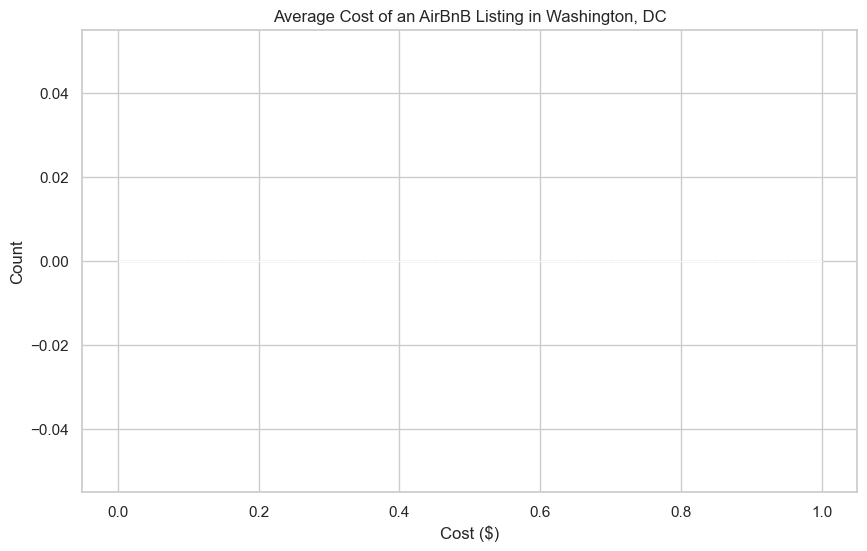

In [5]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist(cost_arr, color="dimgray", bins=20)
axes.set_ylabel( "Count")
axes.set_xlabel( "Cost ($)")
axes.set_title( "Average Cost of an AirBnB Listing in Washington, DC")

plt.show()
plt.close()